# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_data = pd.read_csv("../data/Speed Dating Data.csv")
df_data.shape

(8378, 195)

In [2]:
# select features
cols = ['iid', 'pid', 'match','gender','dec', 'age',
        'attr1_1', 'sinc1_1', 'fun1_1', 'intel1_1', 'amb1_1',
        'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1']

# drop missing values.
row_full = df_data.shape[0]
df_selected = df_data.loc[:, cols]
df_selected.dropna(inplace=True)
row_drop = df_selected.shape[0]

miss_rate = (row_full - row_drop) / row_full
print("missing rate :", miss_rate)

missing rate : 0.0185008355216042


In [3]:
# Separate dataframe into male and female.
df_male = df_selected.loc[ df_selected['gender'] == 1 ]
df_female = df_selected.loc[ df_selected['gender'] == 0 ]

# Then, Let's make dropped duplicates dataframe of male.
df_male_drop = df_male.drop_duplicates(subset=['iid'])
df_female_drop = df_female.drop_duplicates(subset=['iid'])

# Let's make dataframe for matching. (empty yet)
df_match = pd.DataFrame( data = None, columns = cols + 
                        ['dec_o', 'age_o', 
                         'attr1_1_o', 'sinc1_1_o', 'fun1_1_o', 'intel1_1_o',  'amb1_1_o', 
                         'attr3_1_o','sinc3_1_o','fun3_1_o', 'intel3_1_o','amb3_1_o'] )
index = 0

print("dataframe is been making...")
# Let's fill each rows of dataframe for matching.
for m_index, m_row in df_male.iterrows() :
    
    # Find pid row in female_drop dataframe.
    pid = m_row['pid']
    f_row = df_female_drop.loc[ df_female_drop['iid'] == pid ]
    
    if f_row.empty :
        continue
    
    f_row = f_row.iloc[0]
    
    # Extract values from each row of dataframe.
    values = list(m_row.values) + list(f_row['dec':'amb3_1'].values)
    
    # Fill a row of match dataframe
    df_match.loc[index] = values
    index += 1
    
    # Print current progress at each 100 row.
    if index % 100 == 0 :
        print(index, end = " ")

# Let's fill each rows of dataframe for matching.
for fm_index, fm_row in df_female.iterrows() :
    
    # Find pid row in male_drop dataframe.
    pid = fm_row['pid']
    m_row = df_male_drop.loc[ df_male_drop['iid'] == pid ]
    
    if m_row.empty :
        continue
    
    m_row = m_row.iloc[0]
    
    # Extract values from each row of dataframes.
    values = list(fm_row.values) + list(m_row['dec':'amb3_1'].values)
    
    
    # Fill a row of match dataframe
    df_match.loc[index] = values
    index += 1
    
    # Print current progress at each 100 row.
    if index % 100 == 0 :
        print(index, end = " ")

print() 
print("making success.\n")            
print("df_match shape : ", df_match.shape)
df_match.head()

dataframe is been making...
100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 
making success.

df_match shape :  (8078, 28)


,iid,pid,match,gender,dec,age,attr1_1,sinc1_1,fun1_1,intel1_1,...,attr1_1_o,sinc1_1_o,fun1_1_o,intel1_1_o,amb1_1_o,attr3_1_o,sinc3_1_o,fun3_1_o,intel3_1_o,amb3_1_o
0,11.0,1.0,0.0,1.0,0.0,27.0,35.0,20.0,20.0,20.0,...,15.0,20.0,15.0,20.0,15.0,6.0,8.0,8.0,8.0,7.0
1,11.0,2.0,0.0,1.0,0.0,27.0,35.0,20.0,20.0,20.0,...,45.0,5.0,20.0,25.0,0.0,7.0,5.0,10.0,8.0,3.0
2,11.0,3.0,0.0,1.0,0.0,27.0,35.0,20.0,20.0,20.0,...,35.0,10.0,10.0,35.0,10.0,8.0,9.0,8.0,9.0,8.0
3,11.0,4.0,0.0,1.0,0.0,27.0,35.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,10.0,7.0,8.0,9.0,7.0,8.0
4,11.0,5.0,0.0,1.0,0.0,27.0,35.0,20.0,20.0,20.0,...,20.0,5.0,25.0,25.0,10.0,6.0,3.0,6.0,10.0,8.0


# Learning with basic separation

### Separation and select features.

In [6]:
X = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1',
   'attr1_1_o', 'sinc1_1_o', 'fun1_1_o', 'intel1_1_o',  'amb1_1_o',
   'age','age_o'
  ]
Y = ['match']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

train, test = train_test_split(df_match, test_size = 0.25, random_state = 0)

train_X = train[X]
train_Y = train[Y]

test_X = test[X]
test_Y = test[Y]
 
features_one = train_X.values
target = train_Y.values

print("train shape : ", train_X.shape)
print("test shape : ", test_X.shape)

train shape :  (6058, 12)
test shape :  (2020, 12)


### 1. Decision Tree

The accuracy of the Decision Tree is 0.7361386138613861
AUC in ROC curve is 0.5513403592413693


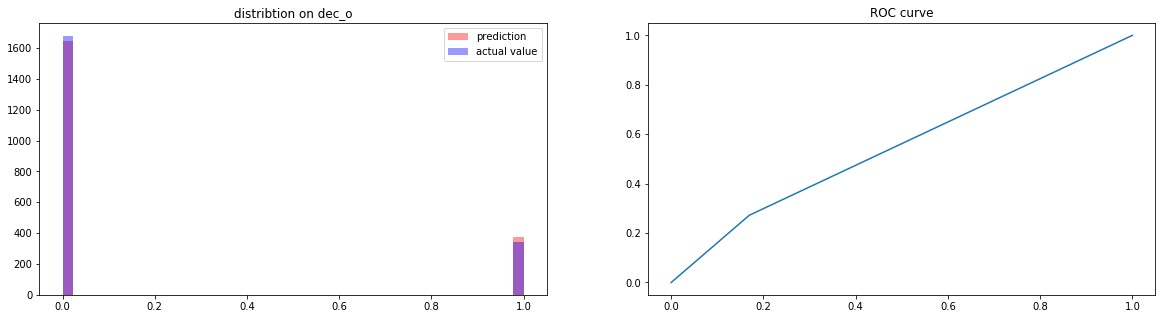

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit( features_one, target )
dt_prediction = clf.predict(test_X)

accuracy = metrics.accuracy_score(dt_prediction, test_Y)
print('The accuracy of the Decision Tree is', accuracy)

# print AUC
auc = metrics.roc_auc_score(test_Y, dt_prediction)
print("AUC in ROC curve is", auc)

fig, axs = plt.subplots(ncols = 2)
fig.set_size_inches(w = 20, h = 5)

# # draw distribution graph
axs[0].set_title("distribtion on dec_o")
sns.distplot(dt_prediction, kde = False, label="prediction", color='red', ax=axs[0])
sns.distplot(test_Y, kde = False, label="actual value", color='blue', ax=axs[0],)
axs[0].legend()

# draw ROC curve
fpr, tpr, threshold = metrics.roc_curve(test_Y, dt_prediction)
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.show()

### 2. Random Forest

C:\Users\Jeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


The accuracy of the Decision Tree is 0.8168316831683168
AUC in ROC curve is 0.5149370247231109


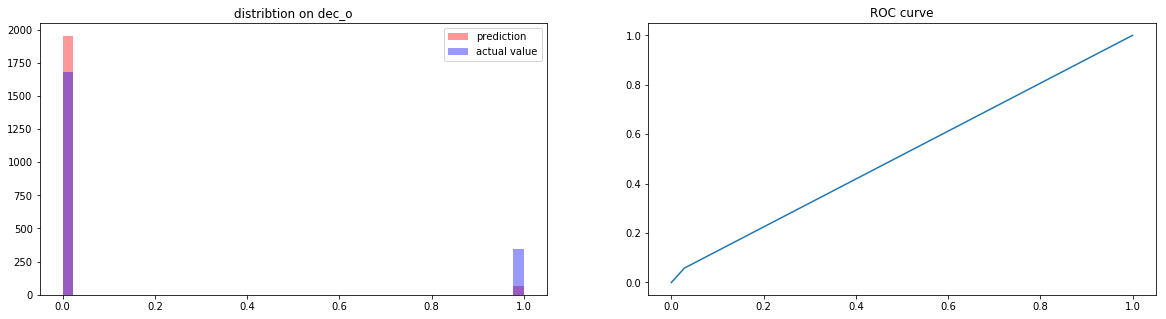

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(features_one, target)
dt_prediction = clf.predict(test_X)

accuracy = metrics.accuracy_score(dt_prediction, test_Y)
print('The accuracy of the Decision Tree is', accuracy)

# print AUC
auc = metrics.roc_auc_score(test_Y, dt_prediction)
print("AUC in ROC curve is", auc)

fig, axs = plt.subplots(ncols = 2)
fig.set_size_inches(w = 20, h = 5)

# # draw distribution graph
axs[0].set_title("distribtion on dec_o")
sns.distplot(dt_prediction, kde = False, label="prediction", color='red', ax=axs[0])
sns.distplot(test_Y, kde = False, label="actual value", color='blue', ax=axs[0],)
axs[0].legend()

# draw ROC curve
fpr, tpr, threshold = metrics.roc_curve(test_Y, dt_prediction)
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.show()

### 3. SVM - linear

In [ ]:
from sklearn import svm

svc = svm.SVC( kernel='linear' )
svc.fit( features_one, target )
prediction = svc.predict( test_X )

accuracy = svc.score( test_X, test_Y )
print('The accuracy of the SVM_linear is', accuracy)

# print AUC
auc = metrics.roc_auc_score(test_Y, prediction)
print("AUC in ROC curve is", auc)

fig, axs = plt.subplots(ncols = 2)
fig.set_size_inches(w = 20, h = 5)

# # draw distribution graph
axs[0].set_title("distribtion on dec_o")
sns.distplot(prediction, kde = False, label="prediction", color='red', ax=axs[0])
sns.distplot(test_Y, kde = False, label="actual value", color='blue', ax=axs[0],)
axs[0].legend()

# draw ROC curve
fpr, tpr, threshold = metrics.roc_curve(test_Y, prediction)
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.show()

C:\Users\Jeon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 4. SVM - rbf

In [ ]:
from sklearn import svm

svc_r = svm.SVC( kernel='rbf' )
svc_r.fit( features_one, target )
prediction = svc_r.predict( test_X )

accuracy = svc_r.score(test_X, test_Y)
print('The accuracy of the SVM_rbf is', accuracy)

# print AUC
auc = metrics.roc_auc_score(test_Y, prediction)
print("AUC in ROC curve is", auc)

fig, axs = plt.subplots(ncols = 2)
fig.set_size_inches(w = 20, h = 5)

# # draw distribution graph
axs[0].set_title("distribtion on dec_o")
sns.distplot(prediction, kde = False, label="prediction", color='red', ax=axs[0])
sns.distplot(test_Y, kde = False, label="actual value", color='blue', ax=axs[0],)
axs[0].legend()

# draw ROC curve
fpr, tpr, threshold = metrics.roc_curve(test_Y, prediction)
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.show()

### 5. SVR

The accuracy of the SVR is -0.055135781760242475


<function matplotlib.pyplot.show>

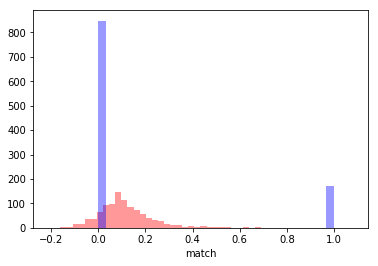

In [24]:
from sklearn import svm
import seaborn as sb

clf = svm.SVR()
clf.fit(features_one, target)
prediction = clf.predict(test_X)

accuracy = clf.score(test_X, test_Y)
print('The accuracy of the SVR is', accuracy)

# comparison visualzaition
sns.distplot(prediction, hist= True, kde=False, label="prediction", color='red')
sns.distplot(test_Y, hist= True, kde=False, label="actual value", color='blue')
plt.show

### 6. KNN

The accuracy of the KNN is 0.8166666666666667
(1020,)


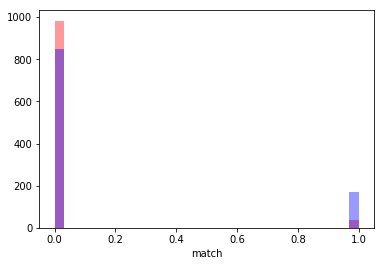

In [25]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn.fit(features_one, target)
prediction = knn.predict(test_X)

accuracy = knn.score(test_X, test_Y)
print('The accuracy of the KNN is', accuracy)

# comparison visualzaition
sns.distplot(prediction, kde = False, color = 'red', label='prediction')
sns.distplot(test_Y, kde = False, color = 'blue', label='actual value')
plt.show()

### 7. Grid Search

C:\Users\Jeon\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Jeon\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


The accuracy of the Grid-search is 0.8333333333333334
(1020,)


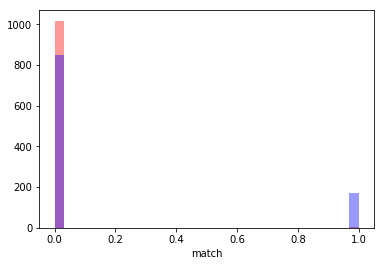

In [26]:
from sklearn import svm, grid_search

gammas = np.logspace(-6,-1,10)
svc_g = svm.SVC()
clf = grid_search.GridSearchCV( estimator=svc_g, param_grid=dict(gamma = gammas), n_jobs=-1 )
clf.fit(features_one, target)
prediction = clf.predict(test_X)

accuracy = clf.score(test_X, test_Y)
print('The accuracy of the Grid-search is', accuracy)

# comparison visualzaition
sns.distplot(prediction, kde = False, color = 'red', label='prediction')
sns.distplot(test_Y, kde = False, color = 'blue', label='actual value')
plt.show()

# Learning with KFold

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

kf = KFold(n_splits=4, random_state=1)

new_data = shuffle(new_data)
# new_data.head()

train_1, test_1 = train_test_split(new_data, test_size=0.2,random_state=0)

data_X=train_1[X]
data_Y=train_1[Y]
    
test_X=test_1[X]
test_Y=test_1[Y]

### 1. Decision Tree

In [27]:
model=DecisionTreeClassifier()

for i, (train, test) in enumerate(kf.split(train_1)):
    train_data_X = np.array(data_X)[train]
    train_data_Y = np.array(data_Y)[train]
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test]
    model.fit(train_data_X, train_data_Y)
    
prediction = model.predict(test_X)

accuracy = metrics.accuracy_score(prediction, test_Y)
print('The accuracy of the Decision Tree is', accuracy)
model.predict(test_X)

# comparison visualzaition
sns.distplot(prediction, kde=False, label="prediction", color='red')
sns.distplot(test_Y, kde=False, label="actual value", color='blue')
plt.show

NameError: name 'kf' is not defined

### 2. SVM - linear

In [39]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=0)

for i, (train, test) in enumerate(kf.split(train_1)):
#     print(test)
    train_data_X = np.array(data_X)[train]
#     print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    svc.fit(train_data_X, train_data_Y)

accuracy = svc.score(test_X, test_Y)
print(accuracy)
svc.predict(test_X)

0.8419117647058824


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### 3. SVM - rbf

In [17]:
from sklearn import svm
svc_r = svm.SVC(kernel='rbf')

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    svc_r.fit(train_data_X, train_data_Y)

accuracy = svc_r.score(test_X, test_Y)
print(accuracy)

svc_r.predict(test_X)

0.8480392156862745


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### 4. KNN

In [35]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test]
    knn.fit(train_data_X, train_data_Y)

accuracy = knn.score(test_X, test_Y)

print('The accuracy of the KNN is',accuracy)

knn.predict(test_X)

The accuracy of the KNN is 0.8308823529411765


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### 5. Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test]
    clf.fit(train_data_X, train_data_Y)
    
accuracy = clf.score(test_X, test_Y)
print(clf.score(test_X, test_Y))

clf.predict(test_X)

0.8272058823529411


array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Preprocessing fill with mean

In [16]:
df_match.isnull().sum()

iid           0
pid           0
match         0
gender        0
attr3_1       0
sinc3_1       0
fun3_1        0
intel3_1      0
amb3_1        0
attr3_1_o     0
sinc3_1_o     0
fun3_1_o      0
intel3_1_o    0
amb3_1_o      0
dtype: int64

In [4]:
df_fill = df_match
df_fill['attr3_1'].fillna(df_fill['attr3_1'].mean(), inplace = True)
df_fill['sinc3_1'].fillna(df_fill['sinc3_1'].mean(), inplace = True)
df_fill['fun3_1'].fillna(df_fill['fun3_1'].mean(), inplace = True)
df_fill['intel3_1'].fillna(df_fill['intel3_1'].mean(), inplace = True)
df_fill['amb3_1'].fillna(df_fill['amb3_1'].mean(), inplace = True)
df_fill['attr3_1_o'].fillna(df_fill['attr3_1_o'].mean(), inplace = True)
df_fill['sinc3_1_o'].fillna(df_fill['sinc3_1_o'].mean(), inplace = True)
df_fill['fun3_1_o'].fillna(df_fill['fun3_1_o'].mean(), inplace = True)
df_fill['intel3_1_o'].fillna(df_fill['intel3_1_o'].mean(), inplace = True)
df_fill['amb3_1_o'].fillna(df_fill['amb3_1_o'].mean(), inplace = True)
df_fill.isnull().sum()

iid           0
pid           0
match         0
gender        0
attr3_1       0
sinc3_1       0
fun3_1        0
intel3_1      0
amb3_1        0
attr3_1_o     0
sinc3_1_o     0
fun3_1_o      0
intel3_1_o    0
amb3_1_o      0
dtype: int64

In [13]:
kf = KFold(n_splits=4, random_state=1)

model=DecisionTreeClassifier()

df_fill = shuffle(df_fill)

train_1, test_1 = train_test_split(df_fill, test_size=0.2,random_state=0)

data_X=train_1[X]
data_Y=train_1[Y]
    
test_X=test_1[X]
test_Y=test_1[Y]

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train]
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test]
    model.fit(train_data_X, train_data_Y)
    
prediction = model.predict(test_X)
print(metrics.accuracy_score(prediction, test_Y))

0.7335722819593787


In [14]:
from sklearn import svm
svc_r = svm.SVC(kernel='linear')

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    svc_r.fit(train_data_X, train_data_Y)

accuracy = svc_r.score(test_X, test_Y)
print(svc_r.score(test_X, test_Y))

0.8267622461170848


In [15]:
from sklearn import svm
svc_r = svm.SVC(kernel='rbf')

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    svc_r.fit(train_data_X, train_data_Y)

accuracy = svc_r.score(test_X, test_Y)
print(svc_r.score(test_X, test_Y))

0.8255675029868578


# Preprocessing with 최빈값

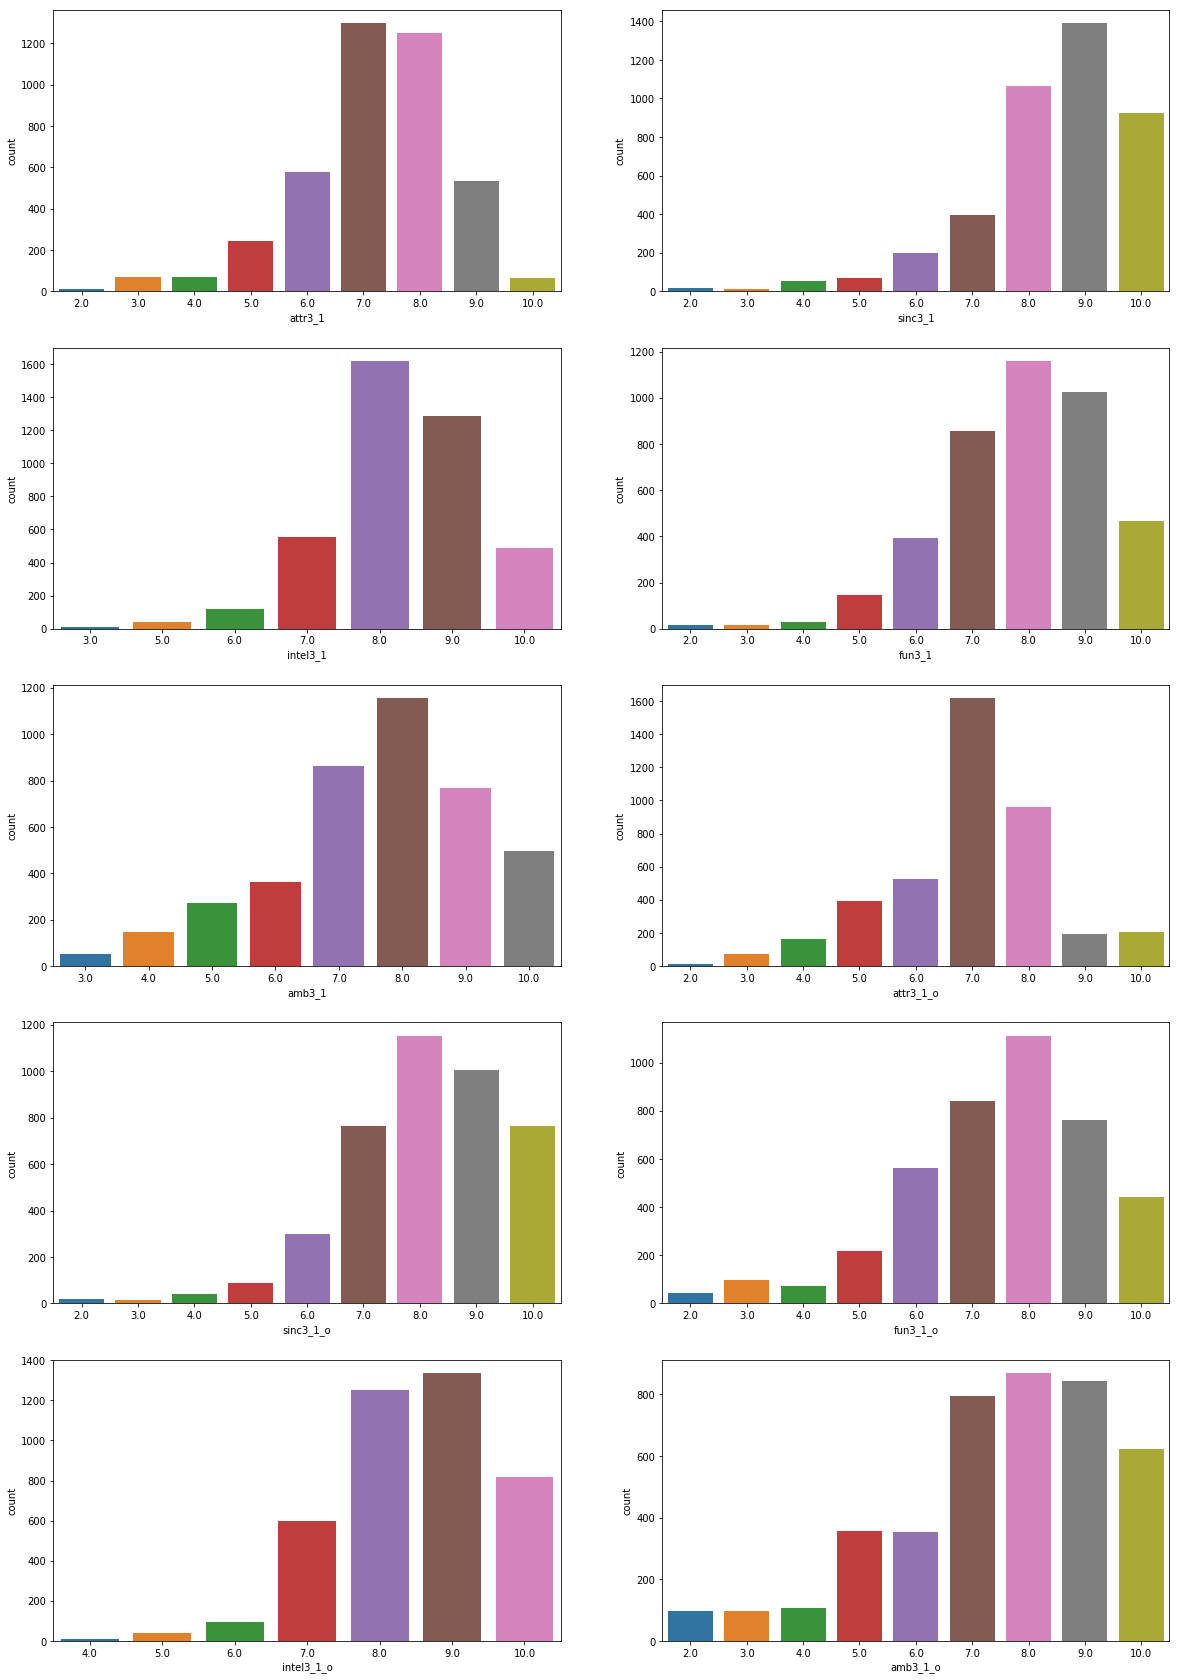

In [4]:
f, ax = plt.subplots(5, 2, figsize=(20,30))
sns.countplot('attr3_1',data=df_match, ax=ax[0,0])
sns.countplot('sinc3_1',data=df_match, ax=ax[0,1])
sns.countplot('intel3_1',data=df_match, ax=ax[1,0])
sns.countplot('fun3_1',data=df_match, ax=ax[1,1])
sns.countplot('amb3_1',data=df_match, ax=ax[2,0])
sns.countplot('attr3_1_o',data=df_match, ax=ax[2,1])
sns.countplot('sinc3_1_o',data=df_match, ax=ax[3,0])
sns.countplot('fun3_1_o',data=df_match, ax=ax[3,1])
sns.countplot('intel3_1_o',data=df_match, ax=ax[4,0])
sns.countplot('amb3_1_o',data=df_match, ax=ax[4,1])

In [ ]:
f, ax = plt.subplots(5, 2, figsize=(20,30))
sns.countplot('attr3_1',data=df_match, ax=ax[0,0])
sns.countplot('sinc3_1',data=df_match, ax=ax[0,1])
sns.countplot('intel3_1',data=df_match, ax=ax[1,0])
sns.countplot('fun3_1',data=df_match, ax=ax[1,1])
sns.countplot('amb3_1',data=df_match, ax=ax[2,0])
sns.countplot('attr3_1_o',data=df_match, ax=ax[2,1])
sns.countplot('sinc3_1_o',data=df_match, ax=ax[3,0])
sns.countplot('fun3_1_o',data=df_match, ax=ax[3,1])
sns.countplot('intel3_1_o',data=df_match, ax=ax[4,0])
sns.countplot('amb3_1_o',data=df_match, ax=ax[4,1])

In [39]:
df_most = df_match
df_most.isnull().sum()

iid            0
pid            0
match          0
gender         0
attr3_1        0
sinc3_1       67
fun3_1        67
intel3_1      67
amb3_1        67
attr3_1_o     38
sinc3_1_o     38
fun3_1_o      38
intel3_1_o    38
amb3_1_o      38
dtype: int64

In [42]:
df_most['attr3_1'].fillna(7, inplace = True)
df_most['sinc3_1'].fillna(9, inplace = True)
df_most['intel3_1'].fillna(8, inplace = True)
df_most['fun3_1'].fillna(8, inplace = True)
df_most['amb3_1'].fillna(8, inplace = True)
df_most['attr3_1_o'].fillna(7, inplace = True)
df_most['sinc3_1_o'].fillna(8, inplace = True)
df_most['intel3_1_o'].fillna(8, inplace = True)
df_most['fun3_1_o'].fillna(9, inplace = True)
df_most['amb3_1_o'].fillna(8, inplace = True)

df_most.isnull().sum()

iid           0
pid           0
match         0
gender        0
attr3_1       0
sinc3_1       0
fun3_1        0
intel3_1      0
amb3_1        0
attr3_1_o     0
sinc3_1_o     0
fun3_1_o      0
intel3_1_o    0
amb3_1_o      0
dtype: int64

In [68]:
kf = KFold(n_splits=4, random_state=1)

model=DecisionTreeClassifier()

df_most = shuffle(df_most)

train_1, test_1 = train_test_split(df_most, test_size=0.2,random_state=0)

data_X=train_1[X]
data_Y=train_1[Y]
    
test_X=test_1[X]
test_Y=test_1[Y]

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train]
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test]
    model.fit(train_data_X, train_data_Y)
    
prediction = model.predict(test_X)
print(metrics.accuracy_score(prediction, test_Y))

0.7144563918757467


In [71]:
from sklearn import svm
svc_r = svm.SVC(kernel='rbf')

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    svc_r.fit(train_data_X, train_data_Y)

accuracy = svc_r.score(test_X, test_Y)
print(svc_r.score(test_X, test_Y))

0.8279569892473119


### Ridge

In [1]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha = 10)

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    reg.fit(train_data_X, train_data_Y)

# reg.predict(test_X)

reg.score(test_X, test_Y)
print(np(reg.coef_!=0).sum())

NameError: name 'kf' is not defined

In [25]:
reg_c = linear_model.RidgeCV(alphas=[0.1,1.0,10.0])

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    reg_c.fit(train_data_X, train_data_Y)
    
reg_c.alpha_

10.0